In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
#!pip3 install ipywidgets

In [3]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [4]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [6]:
#y = data_df[y_cols_1+y_cols_2]

In [7]:
X = data_df['x']
y = data_df[y_cols]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [10]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-09-09 08:28:07.066699: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [12]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [13]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [14]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 1
mu_pos = 10

sigma_neg = 2
sigma_pos = 2

# sigma 1
# 1.5 and 6 flat to rise
# 1.5 and 8 flat to rise (flattens at 10**-3)
# 1.5 and 10 flat to rise
# 1.5 and 20 doesn't work

# sigma 1.5
# 1.5 and 8 flat high
# 2 and 7 flat high
# 3.5 and 8 flat high
# 4 and 11 flat to rise (flattens at 10**-3)

# 3.5 and 5 doesn't work
# 3.5 and 8 flat to rise 
# 3.5 and 10 flat to rise 


a = np.log10(10**(mu_pos) - 10**mu_neg)

# a = 20, inference works, but scale of kd is off.

In [15]:
a

9.999999999565706

In [16]:
mu_pos, mu_neg

(10, 1)

In [17]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [18]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [19]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [20]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [21]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [22]:
#y_train[y_cols_2]

In [23]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[60:64]].values,
                       y_train[y_cols[56:60]].values,
                       y_train[y_cols[52:56]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[8:12]].values,                   
                       y_train[y_cols[4:8]].values,                                      
                       y_train[y_cols[0:4]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 37.2 sec.


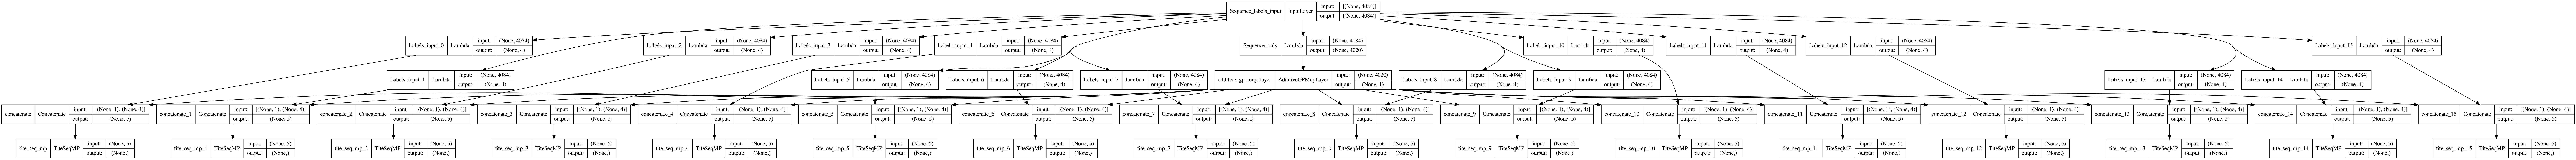

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [25]:

# Fit model to data
model.fit(learning_rate=.001,
          epochs=70,
          batch_size=300,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/70
443/443 [==============================] - 23s 26ms/step - loss: 1840086.1250 - tite_seq_mp_loss: 343153.4375 - tite_seq_mp_1_loss: 73369.3047 - tite_seq_mp_2_loss: 44347.3516 - tite_seq_mp_3_loss: 49270.2344 - tite_seq_mp_4_loss: 74113.1797 - tite_seq_mp_5_loss: 49143.9570 - tite_seq_mp_6_loss: 51070.8672 - tite_seq_mp_7_loss: 78224.6016 - tite_seq_mp_8_loss: 117345.2812 - tite_seq_mp_9_loss: 213320.0156 - tite_seq_mp_10_loss: 120370.8516 - tite_seq_mp_11_loss: 115116.9219 - tite_seq_mp_12_loss: 122756.5000 - tite_seq_mp_13_loss: 137158.1250 - tite_seq_mp_14_loss: 116682.0078 - tite_seq_mp_15_loss: 134643.7500 - I_var: -3.1272 - val_loss: 1760600.0000 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 65794.5938 - val_tite_seq_mp_2_loss: 39945.9297 - val_tite_seq_mp_3_loss: 43037.1797 - val_tite_seq_mp_4_loss: 65665.5547 - val_tite_seq_mp_5_loss: 44758.5977 - val_tite_seq_mp_6_loss: 47011.9375 - val_tite_seq_mp_7_loss: 70829.7422 - val_tite_seq_mp_8_loss: 110206.

443/443 [==============================] - 6s 15ms/step - loss: 1581188.1250 - tite_seq_mp_loss: 343177.4375 - tite_seq_mp_1_loss: 72799.7812 - tite_seq_mp_2_loss: 44978.0898 - tite_seq_mp_3_loss: 52499.7266 - tite_seq_mp_4_loss: 69708.7656 - tite_seq_mp_5_loss: 42828.9766 - tite_seq_mp_6_loss: 38530.3164 - tite_seq_mp_7_loss: 56150.4414 - tite_seq_mp_8_loss: 87747.0234 - tite_seq_mp_9_loss: 176749.5625 - tite_seq_mp_10_loss: 90128.6719 - tite_seq_mp_11_loss: 84185.7266 - tite_seq_mp_12_loss: 91774.1875 - tite_seq_mp_13_loss: 113338.7344 - tite_seq_mp_14_loss: 96496.3750 - tite_seq_mp_15_loss: 120095.1953 - I_var: -2.5946 - val_loss: 1592980.8750 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 55538.5234 - val_tite_seq_mp_2_loss: 39734.8516 - val_tite_seq_mp_3_loss: 50825.8789 - val_tite_seq_mp_4_loss: 63484.3633 - val_tite_seq_mp_5_loss: 49529.3281 - val_tite_seq_mp_6_loss: 46852.3438 - val_tite_seq_mp_7_loss: 58710.1289 - val_tite_seq_mp_8_loss: 89434.4688 - val_tite_se

443/443 [==============================] - 6s 15ms/step - loss: 1483754.8750 - tite_seq_mp_loss: 343191.9688 - tite_seq_mp_1_loss: 79834.8281 - tite_seq_mp_2_loss: 50319.7461 - tite_seq_mp_3_loss: 60168.6602 - tite_seq_mp_4_loss: 74249.1094 - tite_seq_mp_5_loss: 45011.4258 - tite_seq_mp_6_loss: 37382.5547 - tite_seq_mp_7_loss: 49739.8594 - tite_seq_mp_8_loss: 76388.3359 - tite_seq_mp_9_loss: 159872.7031 - tite_seq_mp_10_loss: 76368.7188 - tite_seq_mp_11_loss: 69884.0312 - tite_seq_mp_12_loss: 76335.3828 - tite_seq_mp_13_loss: 98721.6953 - tite_seq_mp_14_loss: 81201.4141 - tite_seq_mp_15_loss: 105082.5078 - I_var: -2.0779 - val_loss: 1483529.5000 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 73485.2266 - val_tite_seq_mp_2_loss: 50041.9414 - val_tite_seq_mp_3_loss: 62187.3672 - val_tite_seq_mp_4_loss: 78059.0938 - val_tite_seq_mp_5_loss: 47729.7852 - val_tite_seq_mp_6_loss: 37783.4062 - val_tite_seq_mp_7_loss: 48558.5508 - val_tite_seq_mp_8_loss: 75235.7500 - val_tite_seq

443/443 [==============================] - 6s 13ms/step - loss: 1448082.6250 - tite_seq_mp_loss: 343089.6875 - tite_seq_mp_1_loss: 84356.8438 - tite_seq_mp_2_loss: 54335.6016 - tite_seq_mp_3_loss: 65808.0312 - tite_seq_mp_4_loss: 80010.4688 - tite_seq_mp_5_loss: 47948.6406 - tite_seq_mp_6_loss: 38089.8281 - tite_seq_mp_7_loss: 47482.2578 - tite_seq_mp_8_loss: 71603.9531 - tite_seq_mp_9_loss: 151907.3281 - tite_seq_mp_10_loss: 70188.0781 - tite_seq_mp_11_loss: 63718.1875 - tite_seq_mp_12_loss: 69566.2031 - tite_seq_mp_13_loss: 91394.9141 - tite_seq_mp_14_loss: 72931.8047 - tite_seq_mp_15_loss: 95647.6484 - I_var: -1.7380 - val_loss: 1485749.8750 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 86454.9219 - val_tite_seq_mp_2_loss: 59864.7344 - val_tite_seq_mp_3_loss: 73809.3281 - val_tite_seq_mp_4_loss: 93203.9922 - val_tite_seq_mp_5_loss: 52012.1016 - val_tite_seq_mp_6_loss: 37773.4336 - val_tite_seq_mp_7_loss: 49243.1523 - val_tite_seq_mp_8_loss: 74554.7578 - val_tite_seq_

443/443 [==============================] - 6s 15ms/step - loss: 1431451.2500 - tite_seq_mp_loss: 343167.0000 - tite_seq_mp_1_loss: 88334.3516 - tite_seq_mp_2_loss: 56969.3828 - tite_seq_mp_3_loss: 71428.5078 - tite_seq_mp_4_loss: 83638.0234 - tite_seq_mp_5_loss: 51176.3477 - tite_seq_mp_6_loss: 39353.2969 - tite_seq_mp_7_loss: 46572.8438 - tite_seq_mp_8_loss: 69096.7031 - tite_seq_mp_9_loss: 147045.8750 - tite_seq_mp_10_loss: 66441.2344 - tite_seq_mp_11_loss: 60047.5391 - tite_seq_mp_12_loss: 65448.5938 - tite_seq_mp_13_loss: 86688.0312 - tite_seq_mp_14_loss: 67277.8281 - tite_seq_mp_15_loss: 88761.8047 - I_var: -1.5249 - val_loss: 1445863.7500 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 81712.2109 - val_tite_seq_mp_2_loss: 56996.3672 - val_tite_seq_mp_3_loss: 72713.6875 - val_tite_seq_mp_4_loss: 92139.3750 - val_tite_seq_mp_5_loss: 54412.9805 - val_tite_seq_mp_6_loss: 40453.9961 - val_tite_seq_mp_7_loss: 46523.3203 - val_tite_seq_mp_8_loss: 68980.6094 - val_tite_seq_

443/443 [==============================] - 6s 14ms/step - loss: 1425540.8750 - tite_seq_mp_loss: 343189.4375 - tite_seq_mp_1_loss: 90035.6484 - tite_seq_mp_2_loss: 59529.4062 - tite_seq_mp_3_loss: 74231.7266 - tite_seq_mp_4_loss: 87922.9141 - tite_seq_mp_5_loss: 53420.6406 - tite_seq_mp_6_loss: 40186.0117 - tite_seq_mp_7_loss: 46073.0312 - tite_seq_mp_8_loss: 67565.4531 - tite_seq_mp_9_loss: 144198.2500 - tite_seq_mp_10_loss: 64480.1914 - tite_seq_mp_11_loss: 58160.2930 - tite_seq_mp_12_loss: 63363.0898 - tite_seq_mp_13_loss: 84164.9609 - tite_seq_mp_14_loss: 64212.6836 - tite_seq_mp_15_loss: 84801.5000 - I_var: -1.3800 - val_loss: 1445967.2500 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 84014.7969 - val_tite_seq_mp_2_loss: 58306.1484 - val_tite_seq_mp_3_loss: 78408.8984 - val_tite_seq_mp_4_loss: 97500.5547 - val_tite_seq_mp_5_loss: 56253.8906 - val_tite_seq_mp_6_loss: 41921.6992 - val_tite_seq_mp_7_loss: 46480.7812 - val_tite_seq_mp_8_loss: 68496.9922 - val_tite_seq_

443/443 [==============================] - 6s 14ms/step - loss: 1423552.1250 - tite_seq_mp_loss: 343071.5625 - tite_seq_mp_1_loss: 91403.3750 - tite_seq_mp_2_loss: 61366.8047 - tite_seq_mp_3_loss: 77969.8203 - tite_seq_mp_4_loss: 90182.5156 - tite_seq_mp_5_loss: 55113.1719 - tite_seq_mp_6_loss: 41209.8359 - tite_seq_mp_7_loss: 46067.7031 - tite_seq_mp_8_loss: 66625.1016 - tite_seq_mp_9_loss: 142159.7188 - tite_seq_mp_10_loss: 63337.6094 - tite_seq_mp_11_loss: 56963.9062 - tite_seq_mp_12_loss: 62076.2812 - tite_seq_mp_13_loss: 82391.6797 - tite_seq_mp_14_loss: 61936.7812 - tite_seq_mp_15_loss: 81671.5703 - I_var: -1.2751 - val_loss: 1455416.8750 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 87316.5312 - val_tite_seq_mp_2_loss: 61205.5234 - val_tite_seq_mp_3_loss: 84244.5078 - val_tite_seq_mp_4_loss: 101329.1406 - val_tite_seq_mp_5_loss: 59704.8750 - val_tite_seq_mp_6_loss: 42460.9727 - val_tite_seq_mp_7_loss: 46901.6992 - val_tite_seq_mp_8_loss: 68031.0234 - val_tite_seq

443/443 [==============================] - 7s 15ms/step - loss: 1424283.2500 - tite_seq_mp_loss: 343125.1562 - tite_seq_mp_1_loss: 92873.4531 - tite_seq_mp_2_loss: 62333.0469 - tite_seq_mp_3_loss: 80279.9922 - tite_seq_mp_4_loss: 92228.0078 - tite_seq_mp_5_loss: 56610.7031 - tite_seq_mp_6_loss: 41933.0195 - tite_seq_mp_7_loss: 46097.3047 - tite_seq_mp_8_loss: 66064.2734 - tite_seq_mp_9_loss: 140940.1250 - tite_seq_mp_10_loss: 62605.0625 - tite_seq_mp_11_loss: 56254.0898 - tite_seq_mp_12_loss: 61336.2227 - tite_seq_mp_13_loss: 81330.1484 - tite_seq_mp_14_loss: 60568.2109 - tite_seq_mp_15_loss: 79698.5859 - I_var: -1.2025 - val_loss: 1451274.6250 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 86024.4688 - val_tite_seq_mp_2_loss: 61071.1250 - val_tite_seq_mp_3_loss: 86513.5625 - val_tite_seq_mp_4_loss: 101866.2344 - val_tite_seq_mp_5_loss: 61419.4492 - val_tite_seq_mp_6_loss: 44732.1992 - val_tite_seq_mp_7_loss: 46685.4688 - val_tite_seq_mp_8_loss: 66404.6484 - val_tite_seq

443/443 [==============================] - 6s 14ms/step - loss: 1426021.1250 - tite_seq_mp_loss: 343260.4688 - tite_seq_mp_1_loss: 93640.7344 - tite_seq_mp_2_loss: 63853.4102 - tite_seq_mp_3_loss: 82463.9297 - tite_seq_mp_4_loss: 94839.1328 - tite_seq_mp_5_loss: 57440.4805 - tite_seq_mp_6_loss: 42579.1289 - tite_seq_mp_7_loss: 46076.1133 - tite_seq_mp_8_loss: 65577.9688 - tite_seq_mp_9_loss: 139759.3281 - tite_seq_mp_10_loss: 61971.5781 - tite_seq_mp_11_loss: 55912.8398 - tite_seq_mp_12_loss: 60822.1016 - tite_seq_mp_13_loss: 80499.0469 - tite_seq_mp_14_loss: 59384.0977 - tite_seq_mp_15_loss: 77934.5547 - I_var: -1.1491 - val_loss: 1457300.3750 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 87855.6641 - val_tite_seq_mp_2_loss: 61715.5898 - val_tite_seq_mp_3_loss: 88795.4688 - val_tite_seq_mp_4_loss: 105112.8438 - val_tite_seq_mp_5_loss: 62828.5664 - val_tite_seq_mp_6_loss: 45300.0234 - val_tite_seq_mp_7_loss: 47079.2109 - val_tite_seq_mp_8_loss: 66756.2109 - val_tite_seq

443/443 [==============================] - 6s 14ms/step - loss: 1426531.3750 - tite_seq_mp_loss: 343237.8750 - tite_seq_mp_1_loss: 94408.5078 - tite_seq_mp_2_loss: 64293.9297 - tite_seq_mp_3_loss: 83525.3906 - tite_seq_mp_4_loss: 95596.4531 - tite_seq_mp_5_loss: 58007.4336 - tite_seq_mp_6_loss: 43189.8086 - tite_seq_mp_7_loss: 46284.3633 - tite_seq_mp_8_loss: 65421.3516 - tite_seq_mp_9_loss: 139206.9531 - tite_seq_mp_10_loss: 61684.8398 - tite_seq_mp_11_loss: 55632.4414 - tite_seq_mp_12_loss: 60563.8125 - tite_seq_mp_13_loss: 80020.9453 - tite_seq_mp_14_loss: 58682.3164 - tite_seq_mp_15_loss: 76769.0000 - I_var: -1.1088 - val_loss: 1466097.6250 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 91258.7422 - val_tite_seq_mp_2_loss: 64723.4180 - val_tite_seq_mp_3_loss: 89444.9141 - val_tite_seq_mp_4_loss: 107025.7969 - val_tite_seq_mp_5_loss: 62447.5742 - val_tite_seq_mp_6_loss: 44361.3867 - val_tite_seq_mp_7_loss: 47946.1484 - val_tite_seq_mp_8_loss: 68385.1172 - val_tite_seq

443/443 [==============================] - 6s 14ms/step - loss: 1427855.6250 - tite_seq_mp_loss: 343093.9062 - tite_seq_mp_1_loss: 95479.7891 - tite_seq_mp_2_loss: 64948.8203 - tite_seq_mp_3_loss: 84707.8984 - tite_seq_mp_4_loss: 96178.8281 - tite_seq_mp_5_loss: 59129.6250 - tite_seq_mp_6_loss: 43642.6094 - tite_seq_mp_7_loss: 46353.6680 - tite_seq_mp_8_loss: 65228.1211 - tite_seq_mp_9_loss: 138682.0156 - tite_seq_mp_10_loss: 61438.8945 - tite_seq_mp_11_loss: 55294.4180 - tite_seq_mp_12_loss: 60271.2812 - tite_seq_mp_13_loss: 79554.6641 - tite_seq_mp_14_loss: 58055.8438 - tite_seq_mp_15_loss: 75788.8828 - I_var: -1.0704 - val_loss: 1478935.5000 - val_tite_seq_mp_loss: 341146.0000 - val_tite_seq_mp_1_loss: 93431.7266 - val_tite_seq_mp_2_loss: 65865.8281 - val_tite_seq_mp_3_loss: 91835.2734 - val_tite_seq_mp_4_loss: 108906.4219 - val_tite_seq_mp_5_loss: 64717.7734 - val_tite_seq_mp_6_loss: 44248.1953 - val_tite_seq_mp_7_loss: 48503.2539 - val_tite_seq_mp_8_loss: 69624.3203 - val_tite_seq

In [26]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

On test data:


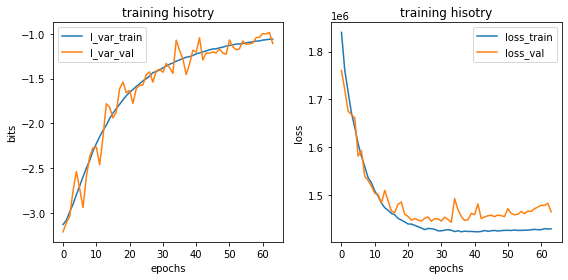

In [27]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [28]:
model.history['loss'][-1]/1e6

1.429803375

In [29]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [30]:
theta

array([[-0.1443044 , -0.55098724, -0.35544342, ..., -0.47483256,
        -0.54667944, -0.5637678 ],
       [-0.22490041, -0.36487174, -0.14224473, ..., -0.1362255 ,
        -0.45422295, -0.38230768],
       [-0.07115801, -0.6303227 ,  0.09859393, ..., -0.09247107,
        -0.33053783, -0.13659213],
       ...,
       [ 0.3247139 ,  0.09927276, -0.12802796, ..., -0.06040184,
         0.24561149, -0.05745121],
       [-0.1452176 ,  0.01563407, -0.08979197, ...,  0.01558317,
         0.12403136,  0.04258343],
       [ 0.3113625 ,  0.54601353,  0.2645221 , ...,  0.3965657 ,
         0.3428155 ,  0.5396162 ]], dtype=float32)

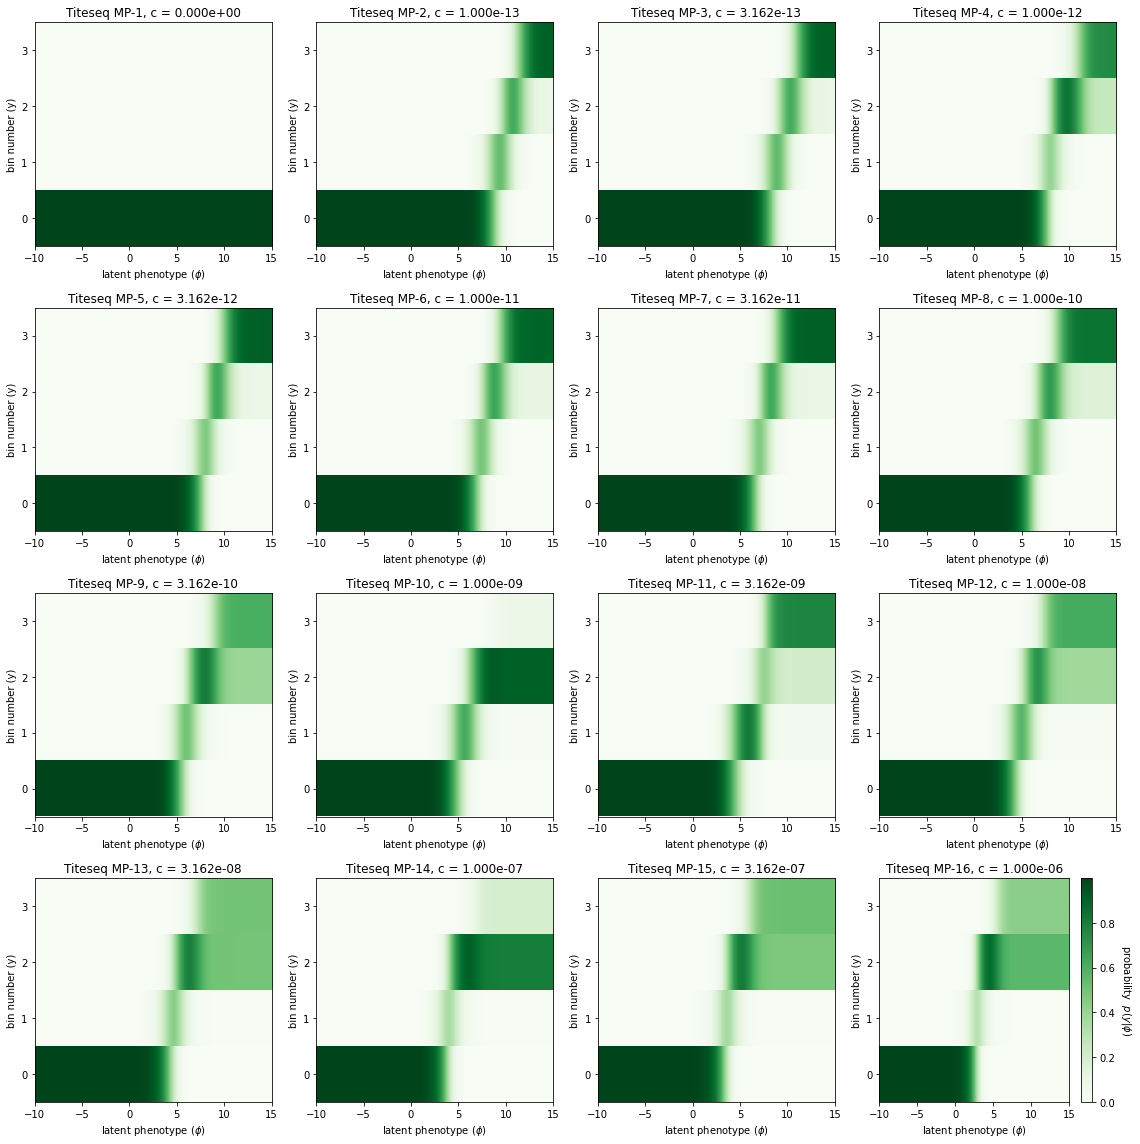

In [31]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-10, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

#fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [32]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [33]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [34]:
theta_df = pd.DataFrame(theta,columns=alphabet)

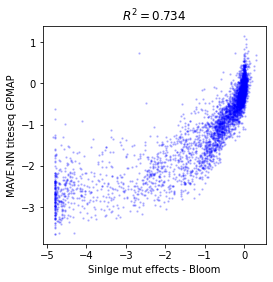

In [35]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [36]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

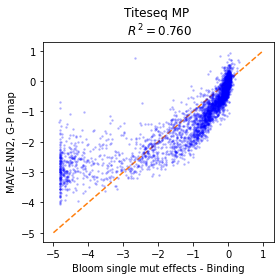

In [37]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
plt.plot(lims,lims,'--',color='C1',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

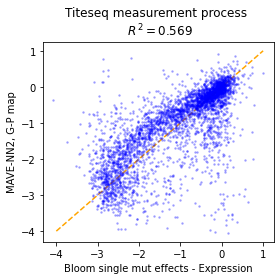

In [38]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

lims = [-4,1]
plt.plot(lims,lims,'--',color='orange',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

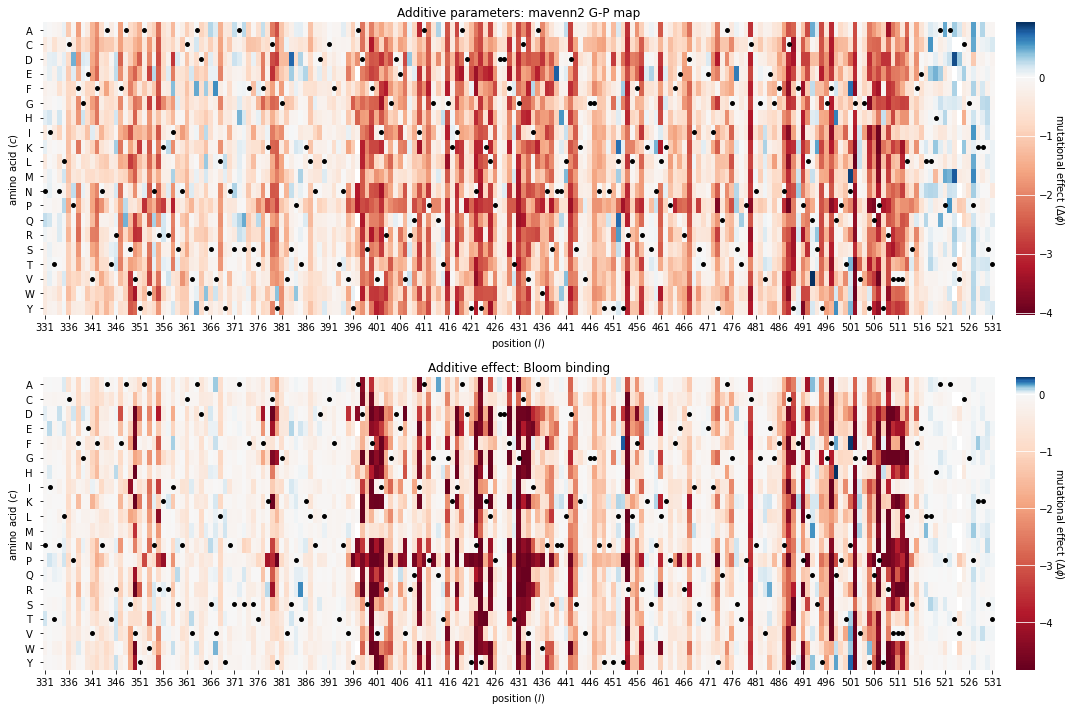

In [39]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [40]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')
theta_lc_consensus_da_df = pd.read_csv('discrete_agnostic_ace2rbd_binding.csv')

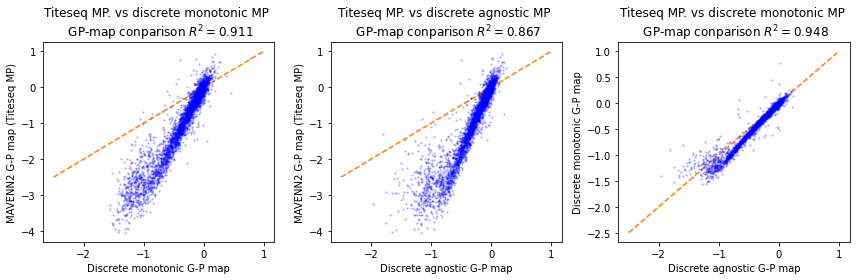

In [41]:
fig, axs = plt.subplots(1,3,figsize=(12,4))

ax = axs[0]
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete monotonic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')


ax = axs[1]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete agnostic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVENN2 G-P map (Titeseq MP)')
fig.tight_layout()


ax = axs[2]
Rsq = np.corrcoef(theta_lc_consensus_da_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(theta_lc_consensus_da_df.values, theta_lc_consensus_dm_df.values,s=2,alpha=0.2,color='blue')

lims = [-2.5,1]
ax.plot(lims,lims,'--',color='C1',zorder=-1)
ax.set_xlabel('Discrete agnostic G-P map')
ax.set_title(f'Titeseq MP. vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
ax.set_ylabel('Discrete monotonic G-P map')
fig.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_agnostic_binding_comparison.png',dpi=200,bbox_inches='tight')

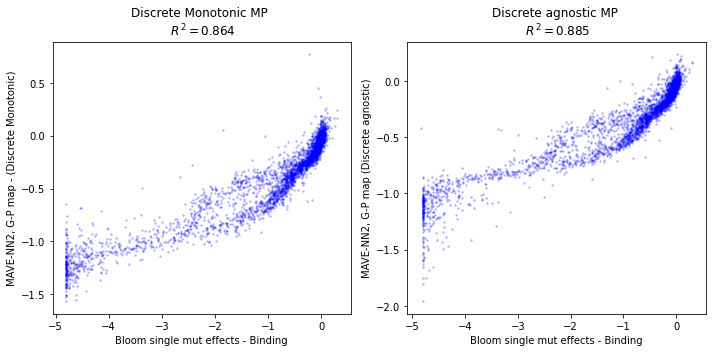

In [42]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_dm_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_dm_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete Monotonic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map - (Discrete Monotonic)')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map (Discrete agnostic)')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

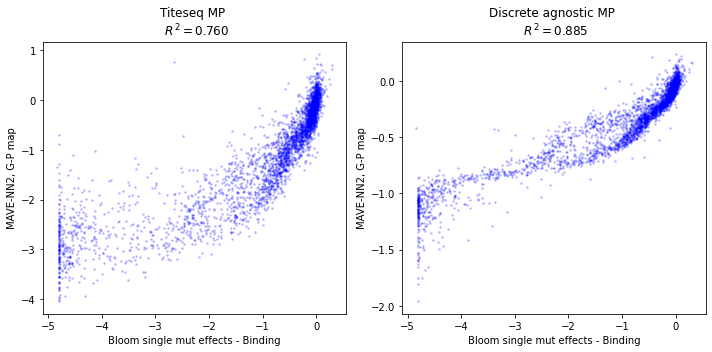

In [43]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Titeseq MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')



ax = axs[1]
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_da_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.values, theta_lc_consensus_da_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
ax.set_xlabel('Bloom single mut effects - Binding')
ax.set_title(f'Discrete agnostic MP \n $R^2 = {Rsq:.3f}$')
ax.set_ylabel('MAVE-NN2, G-P map')


fig.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [44]:
# #phi = gpmap.x_to_phi(x_test)

# #a = mp_list[0].get_weights()[0][0]

# def mu_of_phi(c, 
#               a=a,
#               phi=phi,
#               mu_neg=mu_neg):

#     K_a_of_phi = 10**(phi)
#     B = 10**(mu_neg)
#     A = 10**(a)
    
#     mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
#     return mu_of_phi


In [45]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

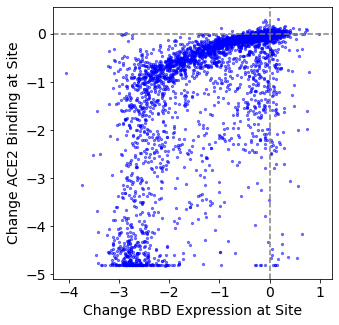

In [46]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

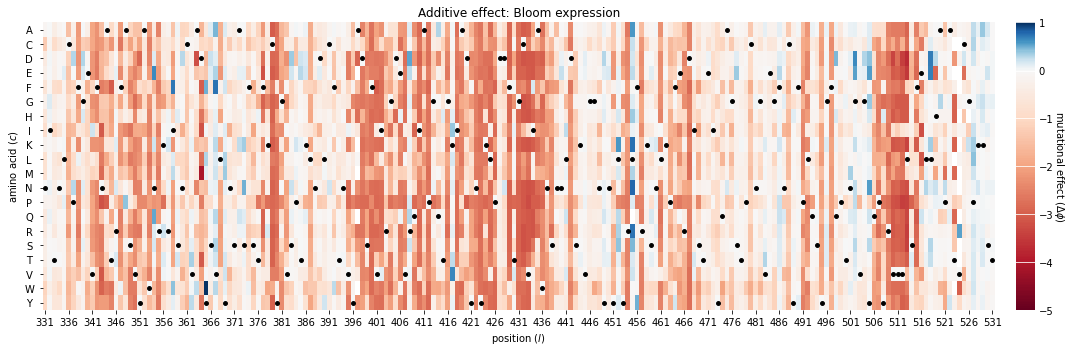

In [47]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [48]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [49]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [50]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [51]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [52]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [53]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

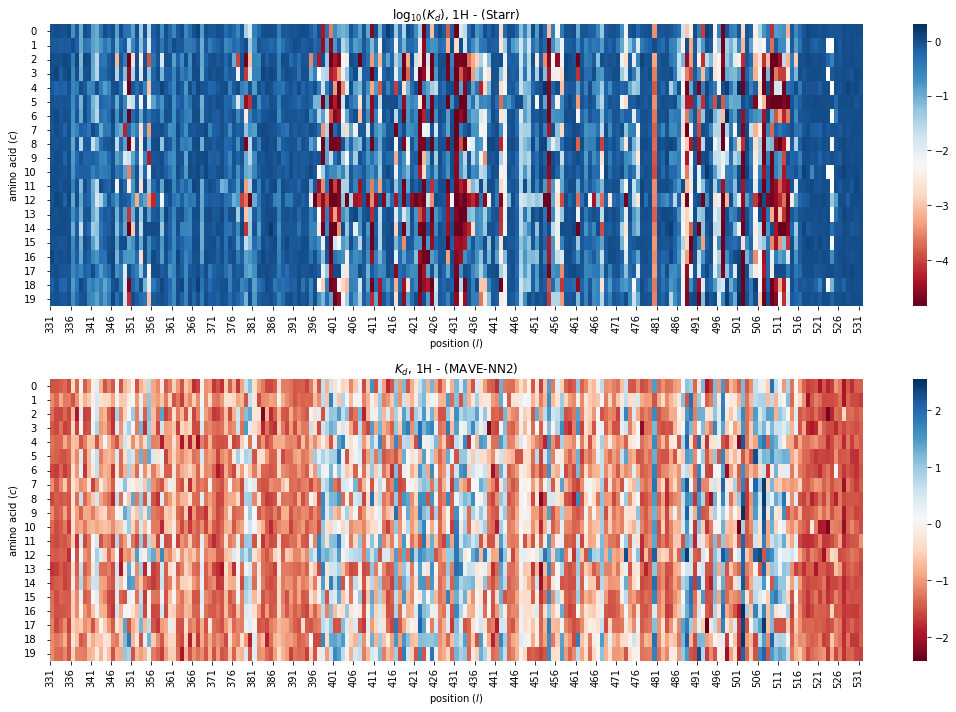

In [54]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


Text(0.5, 0, '$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\\phi)}^{-1}$')

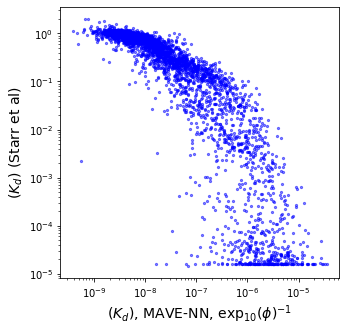

In [55]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [56]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


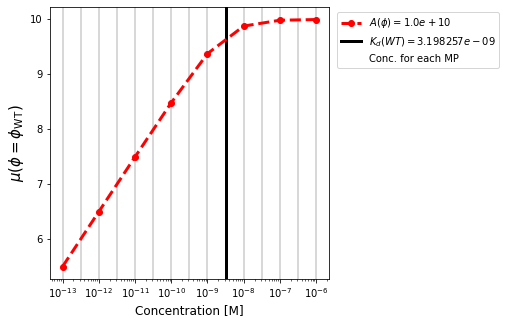

In [57]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(10**-14,)    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

fig.savefig(f'pngs/mu_phi_WT_vs_conc_{mu_pos}_{mu_neg}_{sigma_pos}.png',dpi=300,bbox_inches='tight')


In [58]:
Kd_WT

3.1982567862998847e-09

In [59]:
WT_data_df = data_df[data_df['x']==model.x_consensus].reset_index(drop=True).copy()

In [60]:
y_WT = WT_data_df[y_cols]

In [79]:
y[y_cols]

,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,TiteSeq_03_bin2,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,21,0,0,0,17,0,0,0
2,6,35,162,4,24,85,80,30,10,49,...,37,0,151,4,0,0,154,19,0,0
3,0,1,3,439,1,0,14,307,17,8,...,82,0,180,12,0,12,306,20,0,0
4,0,0,3,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184245,0,0,0,239,0,0,1,167,0,0,...,0,0,246,5,0,0,183,26,0,0
184246,0,29,211,45,0,44,244,19,1,42,...,1,1,147,10,0,0,210,30,0,0
184247,0,24,394,13,0,28,389,2,0,15,...,0,0,388,27,0,0,366,40,0,0
184248,49,17,1,0,19,4,0,5,41,19,...,0,0,88,19,0,0,119,5,0,0


In [91]:
mean_bin_list = []
for idx,conc_index in enumerate(np.arange(1,16+1,1)):
    
    # this is a concentration string to specific numbers of cells sorted in each 
    # of the 4 bins at a particular concentrations
    conc_string = f"{conc_index:02d}"
    
    df_conc = y_WT[[f'TiteSeq_{conc_string}_bin1',
    #df_conc = y[[f'TiteSeq_{conc_string}_bin1',
                 f'TiteSeq_{conc_string}_bin2',
                 f'TiteSeq_{conc_string}_bin3',
                 f'TiteSeq_{conc_string}_bin4']]
    
    # compute n across the 4 bins for a given concentration of ACE2
    n = df_conc.sum(axis=0)
    
    mean_bin = sum([i*n_i for i,n_i in enumerate(n,start=1)])/sum([n_i for n_i in n])
    
    if conc_index == 1:
        #print(mean_bin)
        A = 10**mean_bin
    elif conc_index == 16:
        #print(mean_bin) 
        B = 10**mean_bin
    
    #print(cs[idx],conc_index,mean_bin)
    mean_bin_list.append(mean_bin)

Text(0, 0.5, '$\\overline{bin_{ACE2}}$')

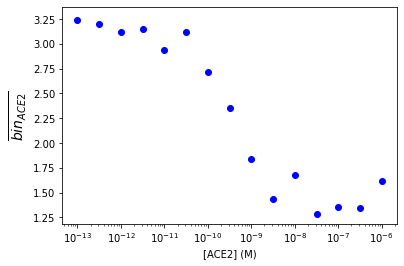

In [92]:
#mean_bin_list
plt.plot(cs, mean_bin_list,'bo')
plt.xscale('log')
plt.xlabel('[ACE2] (M)')
plt.ylabel('$\overline{bin_{ACE2}}$',fontsize=14)

In [93]:

def mean_bin_mavenn2(c, 
                     
                     phi=phi):

    K_a_of_phi = 10**(phi)
    
    #mu_of_phi = np.log10((10**3.27544038433542)*(c*K_a_of_phi)/(1+c*K_a_of_phi)+(10**1.6172296182198262))
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi

In [94]:
Starr_Fig1C_panel_df = pd.read_csv('Starr_Figure_1C_panel_1_data.csv',names=['[ACE2]','rel_ACE_binding'])
Starr_Fig1C_panel_df.columns

Index(['[ACE2]', 'rel_ACE_binding'], dtype='object')

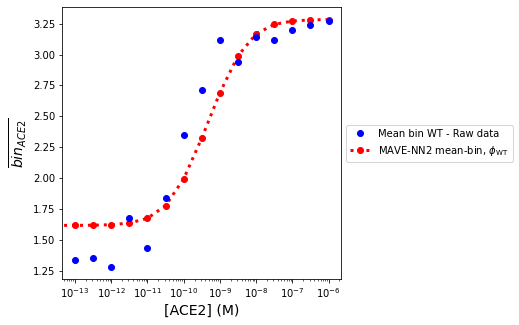

In [98]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

# ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x',ms=7,color='black',label='Fig-1C (Sars-Cov-2), Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
        'ro:',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
#fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


## Make above for a bunch of variants - with a range of k_d values

In [101]:
bloom_binding_Kds_df = pd.read_csv('binding_Kds.txt')

In [106]:
bloom_binding_Kds_df_WT = bloom_binding_Kds_df[bloom_binding_Kds_df['variant_class']=='wildtype'].copy()
bloom_binding_Kds_df_WT.head()

,library,target,barcode,variant_call_support,avgcount,log10Ka,delta_log10Ka,log10SE,response,baseline,nMSR,variant_class,aa_substitutions,n_aa_substitutions
13,lib1,SARS-CoV-2,AAAAAAAAGGACGGAA,9,177.75,10.72,-0.04,0.05,2.89,1.08,0.00,wildtype,NaN,0
57,lib1,SARS-CoV-2,AAAAAAATAATATACC,9,76.16,10.76,-0.01,0.05,2.94,1.03,0.00,wildtype,NaN,0
78,lib1,SARS-CoV-2,AAAAAACAACAATATC,2,22.25,10.83,0.07,0.07,2.94,1.02,0.00,wildtype,NaN,0
89,lib1,SARS-CoV-2,AAAAAACATCTGCATG,24,465.25,10.78,0.02,0.06,2.90,1.06,0.00,wildtype,NaN,0
109,lib1,SARS-CoV-2,AAAAAACGGTTGCATA,4,24.64,10.92,0.16,0.23,2.62,1.00,0.02,wildtype,NaN,0


In [111]:
response = bloom_binding_Kds_df_WT['response']
baseline = bloom_binding_Kds_df_WT['baseline']
log10Ka = bloom_binding_Kds_df_WT['log10Ka']

In [115]:
a_Bloom = np.mean(response)
b_Bloom = np.mean(baseline)
kD_WT_Bloom = np.mean(1/10**log10Ka)

In [117]:
a_Bloom,b_Bloom,kD_WT_Bloom

(2.904943728970878, 1.0714491240283097, 1.7045854729673027e-11)

In [118]:
def mean_bin_Bloom(cs):
    return (a_Bloom * cs)/(cs+kD_WT_Bloom) +b_Bloom

array([3.97634334, 3.97623627, 3.97589776, 3.97482782, 3.97144955,
       3.96081808, 3.92770552, 3.82781449, 3.55333431, 2.95895621,
       2.14553007, 1.5260304 , 1.2324248 , 1.1243589 , 1.08839167,
       1.07144912])

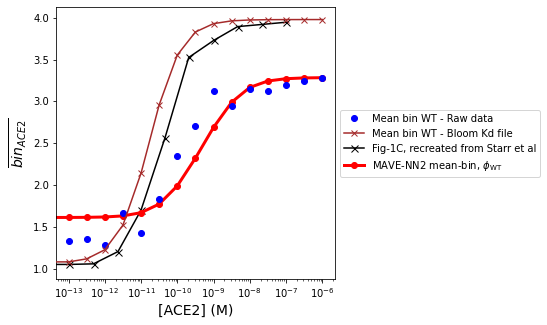

In [131]:
fig, ax = plt.subplots(1,1,figsize=(5,5))


ax.plot(np.array(cs)[::-1],mean_bin_list,'o',color='blue',label='Mean bin WT - Raw data',zorder=10)

ax.plot(np.array(cs)[::-1],mean_bin_Bloom(np.array(cs)[::-1]),'x-',color='brown',label='Mean bin WT - Bloom Kd file',zorder=10)
ax.plot(Starr_Fig1C_panel_df['[ACE2]'],Starr_Fig1C_panel_df['rel_ACE_binding'],'x-',ms=7,color='black',label='Fig-1C, recreated from Starr et al')
ax.plot(np.array(cs)[::-1],(mean_bin_mavenn2(c=np.array(cs)[::-1],phi=phi_WT)),
        'ro-',lw=3,label='MAVE-NN2 mean-bin, $\phi_{\\rm WT}$')

#ax.axvline(3.9*10**(-11))
#ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
ax.set_xlabel('[ACE2] (M)',fontsize=14)
ax.set_ylabel('$\overline{bin_{ACE2}}$',fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xscale('log')
#fig.tight_layout()
fig.savefig('Titeseq_sanity_check.png',dpi=200,bbox_inches='tight',facecolor='white', edgecolor='none')


In [90]:
10**bloom_bind_df

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.933254,0.812831,1.071519,1.000000,0.794328,0.912011,0.954993,0.851138,0.977237,0.891251,0.954993,1.000000,0.933254,1.023293,0.954993,0.933254,1.148154,0.912011,0.691831,0.870964
1,1.000000,0.812831,0.954993,1.202264,0.602560,0.831764,1.096478,1.000000,0.891251,1.000000,1.000000,1.000000,1.148154,0.954993,1.000000,0.912011,0.933254,1.000000,0.933254,0.933254
2,0.977237,0.724436,0.977237,0.707946,0.707946,0.851138,0.851138,0.870964,0.977237,0.977237,0.954993,0.870964,1.071519,1.047129,1.000000,0.831764,1.000000,0.891251,0.616595,0.851138
3,0.933254,0.776247,1.174898,1.023293,0.602560,0.933254,0.954993,0.630957,0.933254,0.630957,0.891251,1.000000,0.660693,1.023293,1.000000,0.870964,0.912011,0.851138,0.575440,0.812831
4,1.096478,0.776247,1.000000,1.148154,0.933254,0.831764,0.933254,0.954993,0.933254,1.000000,1.023293,1.071519,1.148154,0.954993,0.977237,1.023293,1.047129,0.831764,0.891251,0.954993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.047129,1.000000,1.023293,1.047129,1.047129,1.047129,0.977237,1.023293,1.122018,1.096478,1.288250,1.023293,1.000000,1.174898,1.071519,1.071519,1.047129,1.096478,0.630957,1.071519
197,0.954993,0.977237,1.000000,0.954993,1.288250,1.000000,0.977237,0.870964,1.000000,1.000000,1.023293,1.047129,0.691831,1.000000,0.977237,0.977237,0.954993,1.023293,0.954993,0.870964
198,1.000000,1.023293,1.071519,0.870964,1.071519,1.071519,0.954993,1.023293,1.000000,0.977237,1.071519,0.831764,1.023293,1.047129,0.794328,1.023293,0.912011,1.174898,1.000000,1.000000
199,1.000000,0.977237,0.977237,1.122018,1.096478,0.870964,1.000000,1.047129,0.954993,1.047129,1.122018,1.202264,1.047129,0.912011,0.891251,1.000000,0.977237,1.023293,0.977237,1.047129


In [78]:
np.sum(bloom_bind_df.fillna(0).values*(_x_to_mat(x_test.values[0],np.array(model.alphabet))))

-2.4699999999999998

In [75]:
bloom_bind_df.shape

(201, 20)